<a href="https://colab.research.google.com/github/Japjotongithub/Diabetes-Prediction-Project/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA CLEANING
DATA CLEANING

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection


Classifies whether a female has diabetes or not

In [ ]:
import pandas as pd
diabetes_dataset= pd.read_csv('/diabetes.csv')
diabetes_dataset.head()
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0-Diabetic    1-Non-diabetic

In [ ]:
#separating the data and labels
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X=standardized_data
y=diabetes_dataset['Outcome']
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


# SVM

Training the Model

In [ ]:
from sklearn import svm
#training the svm classifier
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [ ]:
#Testing the accuracy of training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy score of the training data:',training_data_accuracy)

#Testing the accuracy of testing data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy score of the test Data: ",test_data_accuracy)

Accuracy score of the training data: 0.7866449511400652
Accuracy score of the test Data:  0.7727272727272727


Making a predictive system

In [ ]:
input_data=(7,166,73,22,167,23.4,0.592,55)

input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

std_data=scaler.transform(input_data_reshaped)
print(std_data)
prediction=classifier.predict(std_data)
print(prediction)


if (prediction[0]==0):
    print("The Person is not diabetic")
else:
    print("The person is diabetic")

[[ 0.93691372  1.41167241  0.2013385   0.09180513  0.75715305 -1.09056353
   0.36278782  1.85143417]]
[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Confusion matrix


(768, 8) (614, 8) (154, 8)
[0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



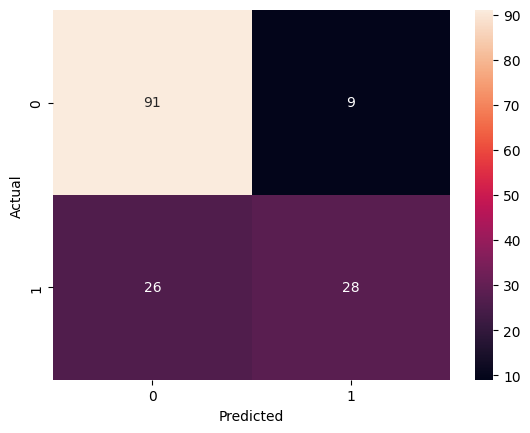

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
diabetes_dataset= pd.read_csv('diabetes.csv')
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']
#data standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)
X=standardized_data
y=diabetes_dataset['Outcome']
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

import matplotlib.pyplot as plt
from sklearn import svm
#training the svm classifier
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)
y=classifier.predict(X_test)
print(y)
#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(Y_test,y)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(Y_test,y))

# KNN
KNN CLASSIFIER IMPLEMENTATION

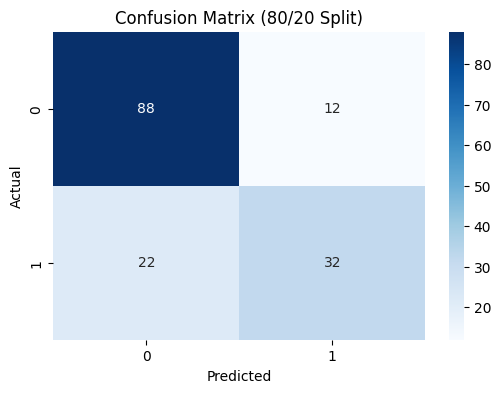

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Separate features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training (80%) and testing (20%) sets with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (80/20 Split)")
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(Y_test, y_pred))


# Logistic Regression and Confusion matrix

Logistic Regression implementation

[0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 1 0 0 1]
[[ 0.93691372  1.41167241  0.2013385   0.09180513  0.75715305 -1.09056353
   0.36278782  1.85143417]]
[1]
The person is diabetic
CONFUSION MATRIX


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



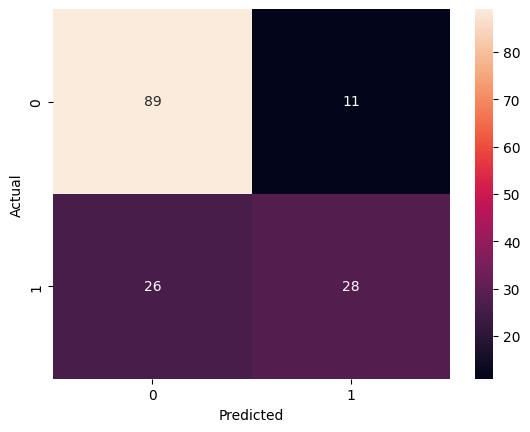

In [ ]:
from math import log
import numpy as np
import pandas as pd
diabetes_dataset= pd.read_csv('/content/diabetes.csv')
diabetes_dataset.head()
diabetes_dataset.shape
diabetes_dataset['Outcome'].value_counts()
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']
#data standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)
X=standardized_data
y=diabetes_dataset['Outcome']
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
#Prediction using testing data
y=logreg.predict(X_test)
print(y)

#Prediction using random data
input_data=(7,166,73,22,167,23.4,0.592,55)

input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

std_data=scaler.transform(input_data_reshaped)
print(std_data)
prediction=logreg.predict(std_data)
print(prediction)


if (prediction[0]==0):
    print("The Person is not diabetic")
else:
    print("The person is diabetic")
print("CONFUSION MATRIX")
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(Y_test,y)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(Y_test,y))

# Decision Tree

Decision Tree Classifier Implementation

[0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1
 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1
 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 1 0 1]
[[ 0.3429808   0.7857295   0.4081295   0.40544544  0.78320173 -1.24286663
   0.91848966  1.2558199 ]]
[1]
The person is diabetic
CONFUSION MATRIX
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       125
           1       0.64      0.81      0.71        67

    accuracy                           0.77       192
   macro avg       0.76      0.78      0.76       192
weighted avg       0.79      0.77      0.78       192



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


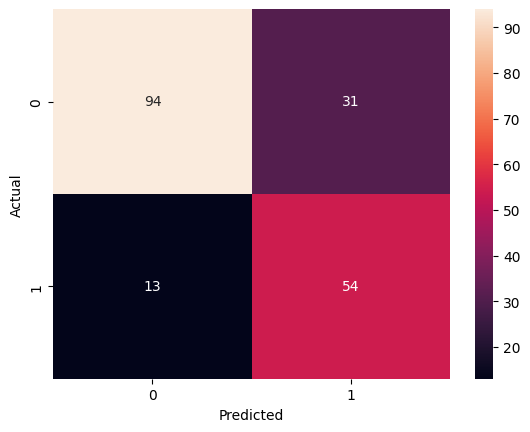

In [ ]:
from math import log
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
diabetes_dataset= pd.read_csv('diabetes.csv')
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)
X=standardized_data
y=diabetes_dataset['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=2)
from sklearn.tree import DecisionTreeClassifier
#Prediction using testing data
dt=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
dt.fit(X_train,Y_train)
y=dt.predict(X_test)
print(y)

#Prediction using random data
input_data=(5,146,77,27,170,22.2,0.776,48)

input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

std_data=scaler.transform(input_data_reshaped)
print(std_data)
prediction=dt.predict(std_data)
print(prediction)


if (prediction[0]==0):
    print("The Person is not diabetic")
else:
    print("The person is diabetic")
#confusion matrix
print("CONFUSION MATRIX")
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(Y_test,y)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(Y_test,y))


Visualizing the tree

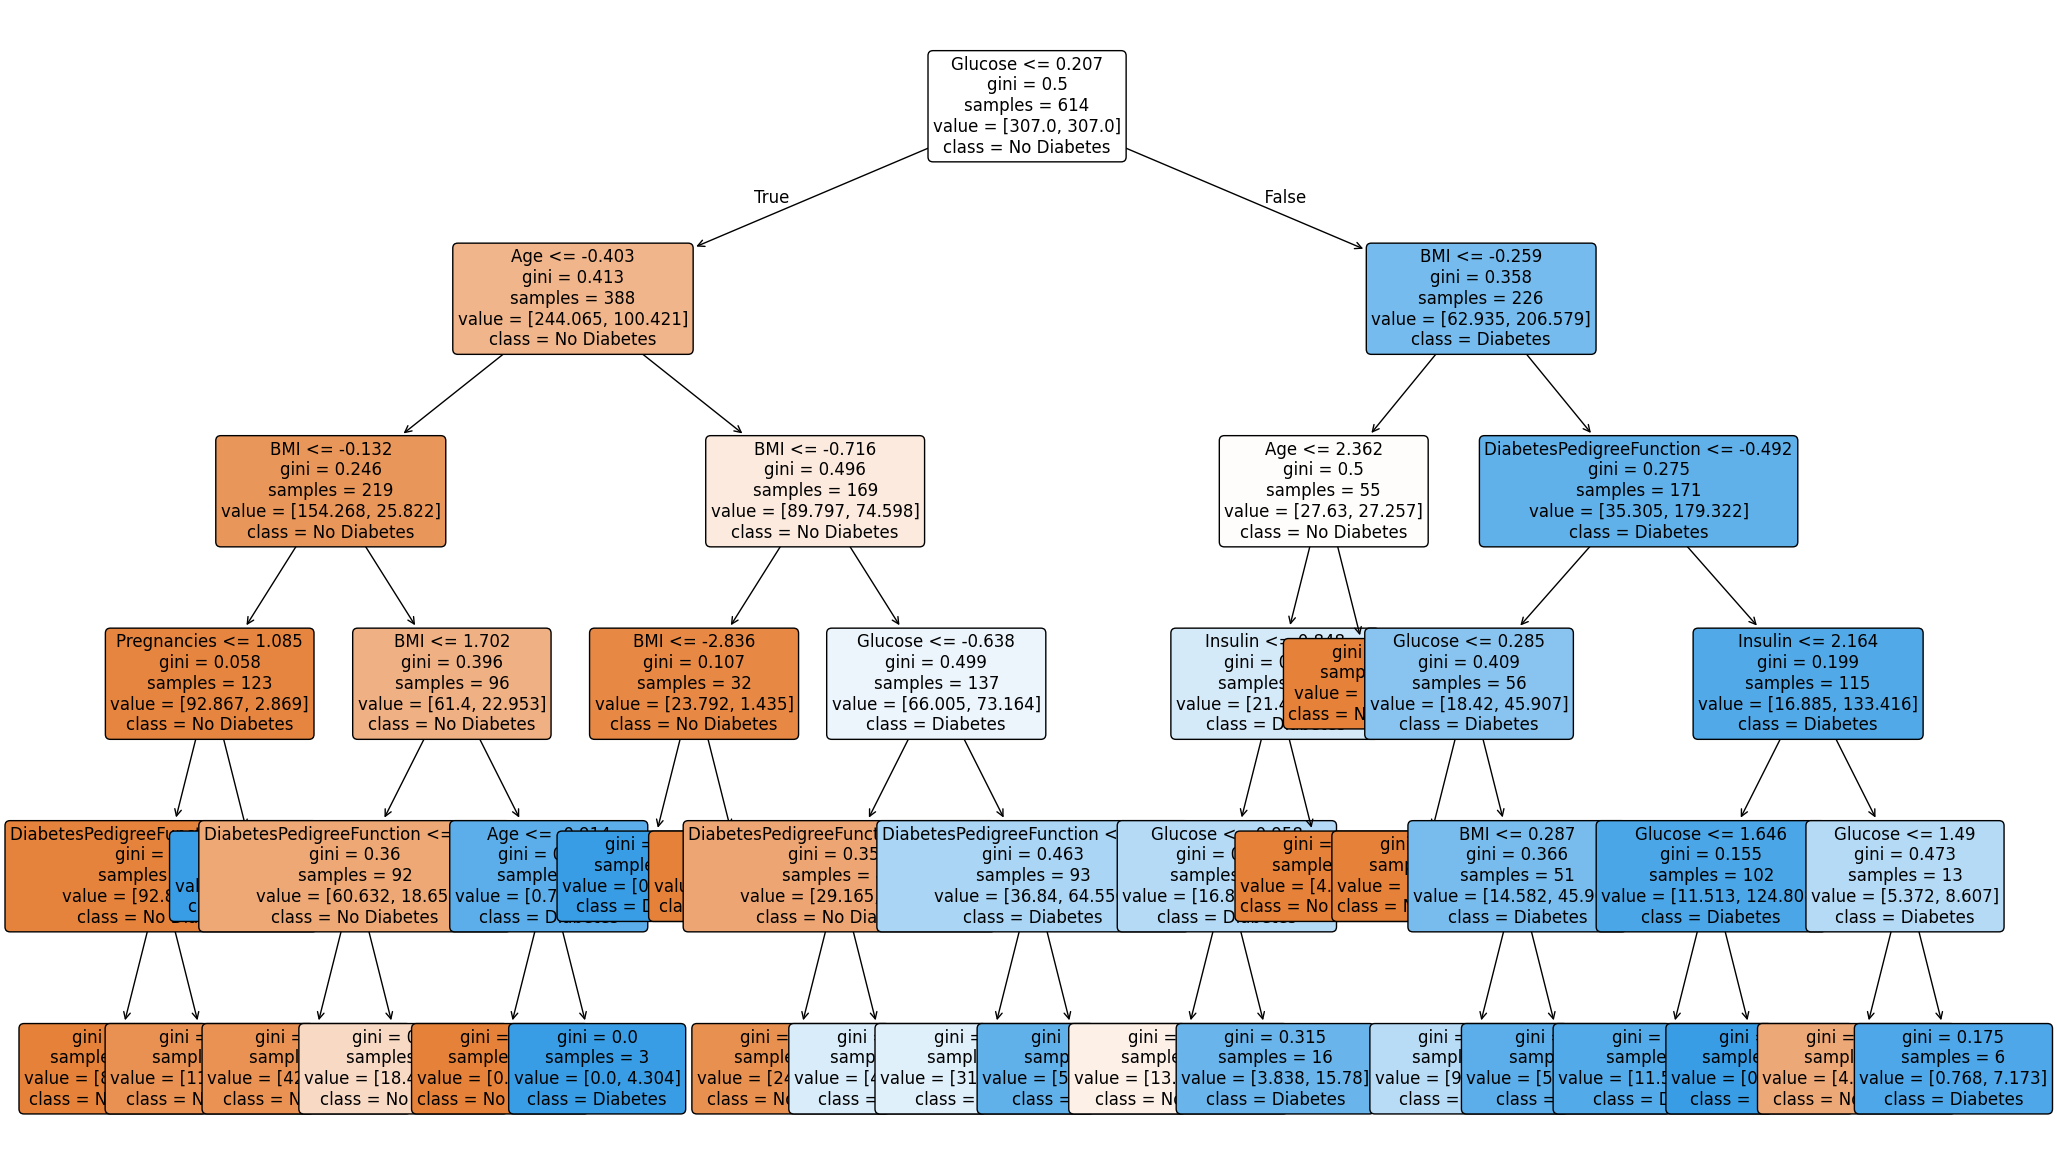

In [ ]:
from math import log
import pandas as pd
diabetes_dataset= pd.read_csv('diabetes.csv')
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']
#data standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)
X=standardized_data
y=diabetes_dataset['Outcome']
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
dt.fit(X_train,Y_train)
y=dt.predict(X_test)
#Visualizing the tree
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree

plt.figure(figsize=(25,15))
plot_tree(dt,
          filled=True,
          feature_names=diabetes_dataset.columns[:-1],
          class_names=['No Diabetes', 'Diabetes'],
          rounded=True,
          fontsize=12)
plt.show()

###plt.figure(figsize=(5,5))
#plot_tree(dt,filled=True)
#plt.show()


# Naive Bayes

Naive Bayes Implementation


[0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1]
[[ 0.3429808   0.66054092  0.2013385   0.40544544  0.82661621 -0.73518964
   0.43527067  1.59617091]]
[0]
The Person is not diabetic
CONFUSION MATRIX
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.72      0.57      0.64        54

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


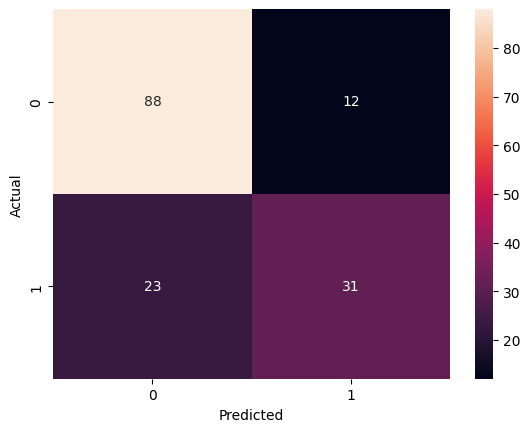

In [ ]:
from math import log
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

diabetes_dataset= pd.read_csv('diabetes.csv')
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']
#Data standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)
X=standardized_data
y=diabetes_dataset['Outcome']
#training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
#Naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)
y=nb.predict(X_test)
print(y)
#Prediction using random data
input_data=(5,142,73,27,175,26.2,0.616,52)

input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

std_data=scaler.transform(input_data_reshaped)
print(std_data)
prediction=nb.predict(std_data)
print(prediction)


if (prediction[0]==0):
    print("The Person is not diabetic")
else:
    print("The person is diabetic")
#confusion matrix
print("CONFUSION MATRIX")
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(Y_test,y)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(Y_test,y))
